In [70]:
import ccxt
import pandas as pd
import time
import sys
sys.path.append('../..')
import numpy as np
from datetime import datetime,timedelta
import mplfinance as mpf
import seaborn as sns
import matplotlib.pyplot as plt
binance=ccxt.binance({
            "apiKey":'apiKey',
            "secret":'apiSecret',
        })
symbol='ETHUSDT'
tf='1m'

In [71]:
df=binance.fetch_ohlcv(symbol,tf,limit=1000)
df=pd.DataFrame(df)
df.columns=['timestamp','open','high','low','close','volume']
df['timestamp']=[datetime.fromtimestamp((x/1000)) for x in df['timestamp']]
df=df.set_index('timestamp')
df

,open,high,low,close,volume
timestamp,,,,,
2022-11-15 03:25:00,1260.37,1261.38,1260.00,1260.04,548.1122
2022-11-15 03:26:00,1260.04,1260.48,1260.00,1260.34,606.2117
2022-11-15 03:27:00,1260.34,1260.48,1260.00,1260.00,301.4534
2022-11-15 03:28:00,1260.01,1261.38,1260.00,1260.27,685.2269
2022-11-15 03:29:00,1260.26,1260.44,1259.08,1259.43,594.7040
...,...,...,...,...,...
2022-11-15 20:00:00,1243.57,1243.92,1240.83,1243.92,602.5023
2022-11-15 20:01:00,1243.88,1243.92,1240.65,1241.88,420.2843
2022-11-15 20:02:00,1241.87,1241.88,1237.08,1237.37,661.9203


In [72]:
df['candlesize']=df['high']-df['low']
df['candlesize']

timestamp
2022-11-15 03:25:00    1.38
2022-11-15 03:26:00    0.48
2022-11-15 03:27:00    0.48
2022-11-15 03:28:00    1.38
2022-11-15 03:29:00    1.36
                       ... 
2022-11-15 20:00:00    3.09
2022-11-15 20:01:00    3.27
2022-11-15 20:02:00    4.80
2022-11-15 20:03:00    2.39
2022-11-15 20:04:00    4.21
Name: candlesize, Length: 1000, dtype: float64

In [73]:
df['avg_size']=df['candlesize'].rolling(30).mean()
df['std_size']=df['candlesize'].rolling(30).std()
sigma=4
sigma2=4
df['bigcandle']=df['candlesize']>(df['avg_size'] + df['std_size']*sigma)
# for i,row in df.iterrows():
#     if df.at[i,'candlesize']>(df.at[i,'avg_size']+df.at[i,'std_size']*sigma2):
#         df.at[i,'bigcandle']=False
df

,open,high,low,close,volume,candlesize,avg_size,std_size,bigcandle
timestamp,,,,,,,,,
2022-11-15 03:25:00,1260.37,1261.38,1260.00,1260.04,548.1122,1.38,NaN,NaN,False
2022-11-15 03:26:00,1260.04,1260.48,1260.00,1260.34,606.2117,0.48,NaN,NaN,False
2022-11-15 03:27:00,1260.34,1260.48,1260.00,1260.00,301.4534,0.48,NaN,NaN,False
2022-11-15 03:28:00,1260.01,1261.38,1260.00,1260.27,685.2269,1.38,NaN,NaN,False
2022-11-15 03:29:00,1260.26,1260.44,1259.08,1259.43,594.7040,1.36,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...
2022-11-15 20:00:00,1243.57,1243.92,1240.83,1243.92,602.5023,3.09,3.310667,2.080360,False
2022-11-15 20:01:00,1243.88,1243.92,1240.65,1241.88,420.2843,3.27,2.997333,1.098089,False
2022-11-15 20:02:00,1241.87,1241.88,1237.08,1237.37,661.9203,4.80,3.043000,1.144221,False


In [74]:
df['highest']=df['high']
df['lowest']=df['low']
lasthigh=0
lastlow=30000
df['color']='black'
for i,row in df.iterrows():
    if df.at[i,'bigcandle']==True:df.at[i,'color']='red'
    if df.at[i,'highest']<lasthigh:df.at[i,'highest']=lasthigh
    if df.at[i,'lowest']>lastlow:df.at[i,'lowest']=lastlow
    lasthigh=df.at[i,'highest']
    lastlow=df.at[i,'lowest']
df['highlag1']=df['highest'].shift(1)
df['lowlag1']=df['lowest'].shift(1)
df

,open,high,low,close,volume,candlesize,avg_size,std_size,bigcandle,highest,lowest,color,highlag1,lowlag1
timestamp,,,,,,,,,,,,,,
2022-11-15 03:25:00,1260.37,1261.38,1260.00,1260.04,548.1122,1.38,NaN,NaN,False,1261.38,1260.00,black,NaN,NaN
2022-11-15 03:26:00,1260.04,1260.48,1260.00,1260.34,606.2117,0.48,NaN,NaN,False,1261.38,1260.00,black,1261.38,1260.00
2022-11-15 03:27:00,1260.34,1260.48,1260.00,1260.00,301.4534,0.48,NaN,NaN,False,1261.38,1260.00,black,1261.38,1260.00
2022-11-15 03:28:00,1260.01,1261.38,1260.00,1260.27,685.2269,1.38,NaN,NaN,False,1261.38,1260.00,black,1261.38,1260.00
2022-11-15 03:29:00,1260.26,1260.44,1259.08,1259.43,594.7040,1.36,NaN,NaN,False,1261.38,1259.08,black,1261.38,1260.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-15 20:00:00,1243.57,1243.92,1240.83,1243.92,602.5023,3.09,3.310667,2.080360,False,1291.00,1234.01,black,1291.00,1234.01
2022-11-15 20:01:00,1243.88,1243.92,1240.65,1241.88,420.2843,3.27,2.997333,1.098089,False,1291.00,1234.01,black,1291.00,1234.01
2022-11-15 20:02:00,1241.87,1241.88,1237.08,1237.37,661.9203,4.80,3.043000,1.144221,False,1291.00,1234.01,black,1291.00,1234.01


In [75]:
df['newlow']=df['low']<df['lowlag1']
df['newhigh']=df['high']>df['highlag1']

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mplfinance/_styles.py:24: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style['base_mpl_style'])


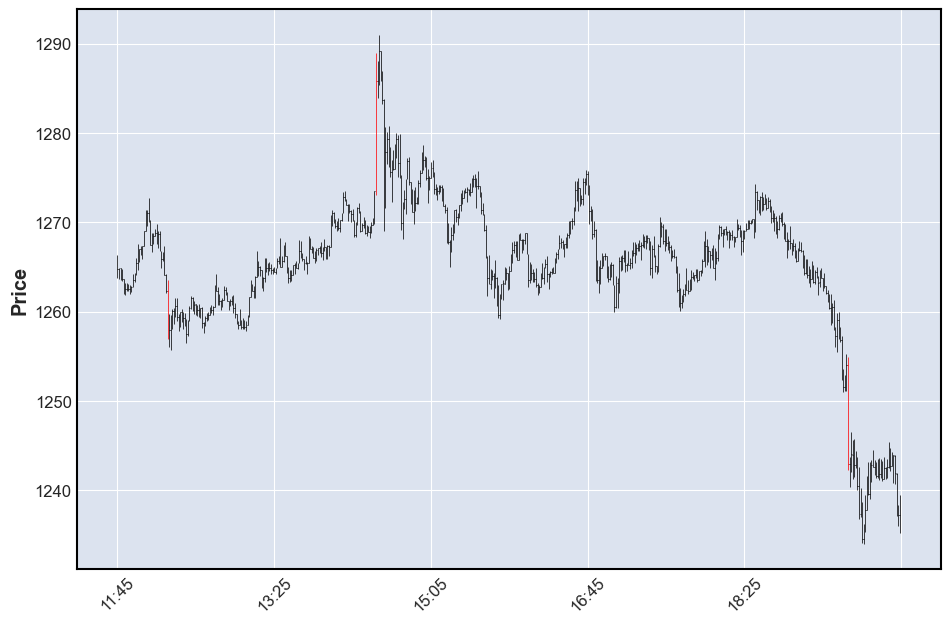

In [76]:
plotdf=df.iloc[-500:]
color_list=plotdf['color'].to_list()
mpf.plot(plotdf,marketcolor_overrides=color_list,figsize=(12,8))

In [77]:
df['logret']=np.log(df['close'])-np.log(df['close'].shift(1))
for i in range(100):
    df[f'cumreturn{i}min']=df['logret'].rolling(i).sum().shift(-i)
df

/var/folders/4l/7gq_zj8n3yz0tdj7wdwtvmcr0000gn/T/ipykernel_905/2982273958.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'cumreturn{i}min']=df['logret'].rolling(i).sum().shift(-i)
/var/folders/4l/7gq_zj8n3yz0tdj7wdwtvmcr0000gn/T/ipykernel_905/2982273958.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'cumreturn{i}min']=df['logret'].rolling(i).sum().shift(-i)
/var/folders/4l/7gq_zj8n3yz0tdj7wdwtvmcr0000gn/T/ipykernel_905/2982273958.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the res

,open,high,low,close,volume,candlesize,avg_size,std_size,bigcandle,highest,...,cumreturn90min,cumreturn91min,cumreturn92min,cumreturn93min,cumreturn94min,cumreturn95min,cumreturn96min,cumreturn97min,cumreturn98min,cumreturn99min
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-11-15 03:25:00,1260.37,1261.38,1260.00,1260.04,548.1122,1.38,NaN,NaN,False,1261.38,...,-0.003076,-0.002718,-0.002368,-0.002177,-0.002782,-0.002782,-0.002925,-0.003458,-0.003482,-0.003769
2022-11-15 03:26:00,1260.04,1260.48,1260.00,1260.34,606.2117,0.48,NaN,NaN,False,1261.38,...,-0.002956,-0.002606,-0.002415,-0.003020,-0.003020,-0.003163,-0.003696,-0.003720,-0.004007,-0.003362
2022-11-15 03:27:00,1260.34,1260.48,1260.00,1260.00,301.4534,0.48,NaN,NaN,False,1261.38,...,-0.002336,-0.002145,-0.002750,-0.002750,-0.002893,-0.003426,-0.003450,-0.003737,-0.003092,-0.002352
2022-11-15 03:28:00,1260.01,1261.38,1260.00,1260.27,685.2269,1.38,NaN,NaN,False,1261.38,...,-0.002359,-0.002964,-0.002964,-0.003107,-0.003641,-0.003665,-0.003951,-0.003306,-0.002566,-0.002717
2022-11-15 03:29:00,1260.26,1260.44,1259.08,1259.43,594.7040,1.36,NaN,NaN,False,1261.38,...,-0.002297,-0.002297,-0.002441,-0.002974,-0.002998,-0.003285,-0.002640,-0.001899,-0.002051,-0.000802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-15 20:00:00,1243.57,1243.92,1240.83,1243.92,602.5023,3.09,3.310667,2.080360,False,1291.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-15 20:01:00,1243.88,1243.92,1240.65,1241.88,420.2843,3.27,2.997333,1.098089,False,1291.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-15 20:02:00,1241.87,1241.88,1237.08,1237.37,661.9203,4.80,3.043000,1.144221,False,1291.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
for i,row in df.iterrows():
    if df.at[i,'bigcandle']==True and (df.at[i,'close']>df.at[i,'open'] and df.at[i,'cumreturn20min']<0):df.at[i,'color']='green'
    if df.at[i,'bigcandle']==True and (df.at[i,'close']<df.at[i,'open'] and df.at[i,'cumreturn20min']>0):df.at[i,'color']='green'

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mplfinance/_styles.py:24: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style['base_mpl_style'])


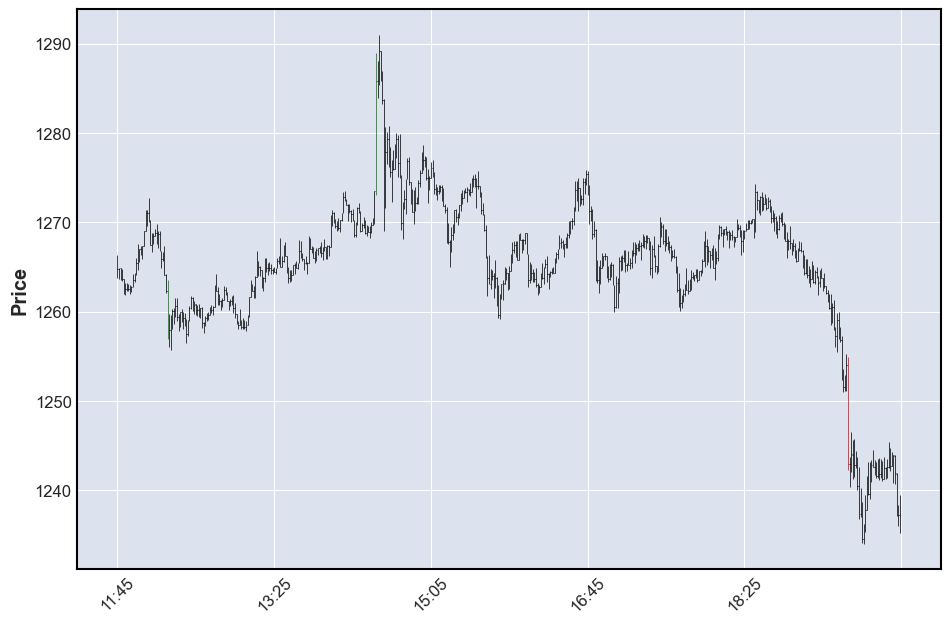

In [79]:
plotdf=df.iloc[-500:]
colorList=plotdf['color'].to_list()
mpf.plot(plotdf,marketcolor_overrides=colorList,figsize=(12,8))

In [80]:
colorList=df['color'].to_list()
profitrate=colorList.count('green')-colorList.count('red')
profitrate
colorList.count('green') * 100 / (colorList.count('red')+colorList.count('green'))

50.0

In [81]:
upcandlereturn=df.loc[df['bigcandle']==True].loc[df['open']<df['close']].cumreturn20min.sum()
downcandlereturn=df.loc[df['bigcandle']==True].loc[df['open']>df['close']].cumreturn20min.sum()
print(f'log return sum of the next 10mins for upside moon candles: {upcandlereturn}, for downside moon candles: {downcandlereturn}')

log return sum of the next 10mins for upside moon candles: -0.004119753778255131, for downside moon candles: 0.0010220121477768629


/var/folders/4l/7gq_zj8n3yz0tdj7wdwtvmcr0000gn/T/ipykernel_905/1677066280.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  down_mean_values=down_mooncandles.mean().to_numpy()
/var/folders/4l/7gq_zj8n3yz0tdj7wdwtvmcr0000gn/T/ipykernel_905/1677066280.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  up_mean_values=up_mooncandles.mean().to_numpy()


[ 0.00000000e+00  8.88863429e-05  7.83957355e-04  1.11180034e-03
  1.19115597e-03  1.63576172e-03 -1.20407586e-04 -1.56230586e-03
 -7.01010416e-04 -2.41288409e-03 -2.24841455e-03 -1.55124557e-03
 -8.39005585e-04 -6.42263610e-04  1.04148172e-03  1.68287998e-03
  1.21383276e-03  1.15988934e-03  5.29477320e-04  1.28384079e-03
  5.11006074e-04  1.36704197e-03 -4.01911810e-05  2.99967362e-04
  1.98491292e-04  6.14089733e-04  1.56432136e-03  1.14690088e-03
  1.43306420e-03  1.71664316e-03  1.84708717e-03 -1.85854418e-04
 -4.71976768e-04 -1.36539367e-03  2.64536758e-03  3.30363541e-03
  4.19121412e-03  3.76337274e-03  3.20056184e-03  2.93886581e-03
  3.24813558e-03  3.66827201e-03  2.56602895e-03  2.05017435e-03
  1.29575400e-03  1.09712770e-03  1.49434086e-03  8.82566975e-04
  9.85879739e-04  8.90514490e-04  1.12096494e-03  1.80405763e-03
  3.54145697e-03  4.62679042e-03  4.06446539e-03  3.56523601e-03
  5.30749331e-03  5.82957913e-03  6.24863263e-03  5.93238210e-03
  5.10966233e-03  5.24419

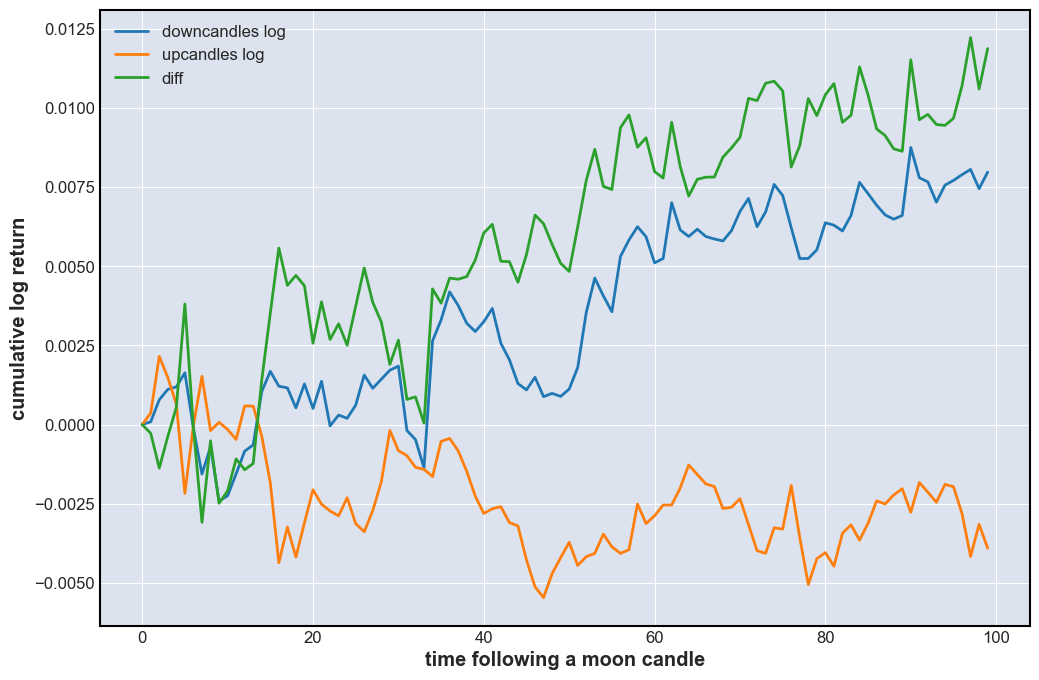

In [82]:
downMoonCandles=df[df['bigcandle']==True].loc[df['open']>df['close']]
upMoonCandles=df[df['bigcandle']==True].loc[df['open']<df['close']]
downMeanValues=downMoonCandles.mean().to_numpy()
upMeanValues=upMoonCandles.mean().to_numpy()
downMeanValues=downMeanValues[16:]
upMeanValues=upMeanValues[16:]
plt.figure(figsize=(12,8))
plt.plot(downMeanValues,label='downcandles log')
plt.plot(upMeanValues,label='upcandles log')
plt.plot(downMeanValues-upMeanValues,label='diff')
plt.xlabel('time following a moon candle')
plt.ylabel('cumulative log return')
plt.legend()

In [83]:
df[df['bigcandle']==False]

,open,high,low,close,volume,candlesize,avg_size,std_size,bigcandle,highest,...,cumreturn90min,cumreturn91min,cumreturn92min,cumreturn93min,cumreturn94min,cumreturn95min,cumreturn96min,cumreturn97min,cumreturn98min,cumreturn99min
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-11-15 03:25:00,1260.37,1261.38,1260.00,1260.04,548.1122,1.38,NaN,NaN,False,1261.38,...,-0.003076,-0.002718,-0.002368,-0.002177,-0.002782,-0.002782,-0.002925,-0.003458,-0.003482,-0.003769
2022-11-15 03:26:00,1260.04,1260.48,1260.00,1260.34,606.2117,0.48,NaN,NaN,False,1261.38,...,-0.002956,-0.002606,-0.002415,-0.003020,-0.003020,-0.003163,-0.003696,-0.003720,-0.004007,-0.003362
2022-11-15 03:27:00,1260.34,1260.48,1260.00,1260.00,301.4534,0.48,NaN,NaN,False,1261.38,...,-0.002336,-0.002145,-0.002750,-0.002750,-0.002893,-0.003426,-0.003450,-0.003737,-0.003092,-0.002352
2022-11-15 03:28:00,1260.01,1261.38,1260.00,1260.27,685.2269,1.38,NaN,NaN,False,1261.38,...,-0.002359,-0.002964,-0.002964,-0.003107,-0.003641,-0.003665,-0.003951,-0.003306,-0.002566,-0.002717
2022-11-15 03:29:00,1260.26,1260.44,1259.08,1259.43,594.7040,1.36,NaN,NaN,False,1261.38,...,-0.002297,-0.002297,-0.002441,-0.002974,-0.002998,-0.003285,-0.002640,-0.001899,-0.002051,-0.000802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-15 20:00:00,1243.57,1243.92,1240.83,1243.92,602.5023,3.09,3.310667,2.080360,False,1291.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-15 20:01:00,1243.88,1243.92,1240.65,1241.88,420.2843,3.27,2.997333,1.098089,False,1291.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-15 20:02:00,1241.87,1241.88,1237.08,1237.37,661.9203,4.80,3.043000,1.144221,False,1291.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
